## Title :
Exercise: PCA 2 - Implementing PCA from scratch (Numpy)

## Description :
To produce a plot that roughly looks like following: 

![fig2](fig/fig2.png)

## Data Description:

## Instructions:

### Part - I

In this question, you have to implement the PCA technique using **numpy**. 

The idea is to maximize the variance along axes by rotating the points. Given the rotation matrix:

$$R\ =\ \left[\begin{matrix}\cos\theta&-\sin\theta\\\sin\theta&\cos\theta\end{matrix}\right]$$

the rotation of a matrix X is given by 

$$X_{R\ }=\ X\cdot R$$

where X_R is the rotated matrix and  · symbol is the dot product operator.

Once you have the `transform_pca` function, you have to evaluate and save the variance for each angle in thetas list.

The best angle will be:

For every $\theta$ we find $var(X_p)$ 
   - Best angle is $\theta$ corresponding to $max(var(X_p))$

Note that we are only using variance for first predictor. 

Notice that the angle is in radians then:

$$\theta_{\deg ree}\ =\ \theta_{\left\{radians\right\}}\cdot\frac{180}{pi}$$

Finally, you have to visualize the rotation given the best angle.

### Part - II

On this part, the idea is to compare the results with **scikit-learn**

First, fit the PCA `model using PCA(n_components = 2) as you` did before in Q1. Given the components matrix C, the rotation angle is defined as follow:

$$\theta\ =\ \arctan\left(\frac{component\left(0,0\right)}{component\left(0,1\right)}\right)$$

## Hints: 

`test_transform_pca`  - You may use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html" target="_blank">np.dot</a> to calculate dot product. `transform_pca()` returns $X_p$

`test_variances` - You may use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html" target="_blank">np.var</a> to calculate variances, using the correct `axis` parameter. 

`test_angle` - See <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html" target="_blank">np.argmax</a> to find index of the maximum value in an array, use <a href="https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.pi" target="_blank">np.pi</a> for $\pi$

`test_PCA_fit` - <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit" target="_blank">PCA.fit()</a> - Note that this is unsupervised learning method. (Similar to Q1) 

`test_angle_sklearn` - You may use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan.html" target="_blank">np.arctan</a> with component(0,0) and component(0,1) as mentioned above.

All the blanks are vectorized code (one liners, no looping constructs required).

**Note:** You do not need to standardize for this particular exercise. 
This exercise is auto-graded and you can try multiple attempts.

# PCA 2

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## Loading data

In [2]:
X = np.loadtxt('data/PCA.csv')
print(X.shape)

(500, 2)


## Numpy PCA

In [4]:
### edTest(test_transform_pca) ###
def transform_pca(X, theta):
    """
    Make linear transformation given particular angle
    
    Parameters:
        X (np.array)  : Input matrix
        theta (float) : Radians angle
        
    Returns: Transformed input matrix
        Xp (np.array)
    """
    R = np.array( [[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    Xp = X @ R 
    return Xp

## Selecting the best angle 

For every $\theta$ we find $var(X_p)$ 
   - Best angle is $\theta$ corresponding to $max(var(X_p))$ where $X_p = X \cdot R$

Note that we are only using variance for first predictor. 



In [6]:
### edTest(test_variances) ###
thetas = np.arange(0, np.pi/2, 0.01) # Angles for rotation
var_a1 = [] # First component variances

for theta in thetas: 
    Xp = transform_pca(X,theta) 
    var = np.var(Xp, axis=0)
    var_a1.append(var[0])


In [7]:
### edTest(test_angle) ###

#We have an array of theta values (thetas). Here we want to pick the 
# value of theta that corresponds to maximum variance for first component. 
angle_numpy = thetas[np.argmax(var_a1)]  
angle_np_degree = angle_numpy*180/np.pi # converting to degrees

print('Best angle: {:.2f}'.format(angle_np_degree))

Best angle: 46.41


In [8]:
### edTest(test_linear_transformation) ###
Xp = transform_pca(X, angle_numpy) # Linear transformation of the input

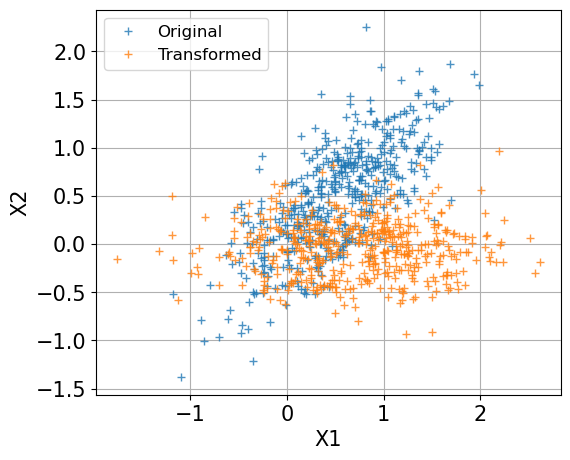

In [9]:
plt.figure(figsize=(6, 5))
plt.plot(X[:,0], X[:,1], "+", alpha=0.8, label='Original')
plt.plot(Xp[:,0], Xp[:,1], "+", alpha=0.8, label='Transformed')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

## Comparing with Scikit-learn PCA

In [11]:
### edTest(test_PCA_fit) ###
from sklearn.decomposition import PCA

pca = PCA().fit(X) 
pca_x = pca.transform(X) 

### Getting angle from components

In [16]:
### edTest(test_angle_sklearn) ###
components = pca.components_
angle_sklearn = np.arctan2(components[0, 1], components[0, 0]) 
angle_sklearn_degrees = angle_sklearn*180/np.pi
print('Best angle: {:.2f}'.format(angle_sklearn_degrees))

Best angle: -133.46


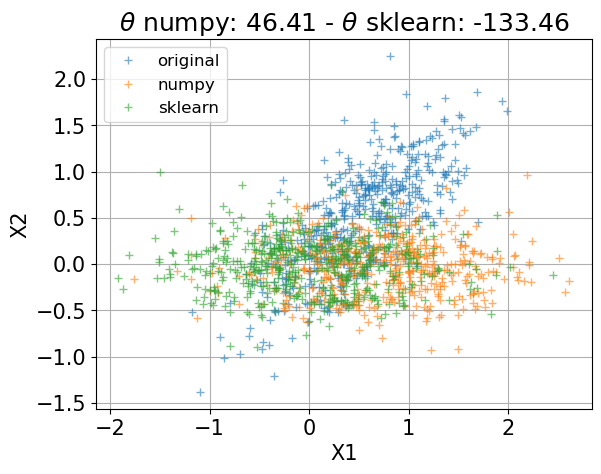

In [17]:
plt.figure()
plt.plot(X[:,0], X[:,1], '+', label='original', alpha=0.6)
plt.plot(Xp[:,0], Xp[:,1], '+', label='numpy', alpha=0.6)
plt.plot(pca_x[:,0], pca_x[:,1], '+', label='sklearn', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.title(r'$\theta$ numpy: {:.2f} - $\theta$ sklearn: {:.2f}'.format(angle_np_degree, angle_sklearn_degrees),
         fontsize=18)
plt.grid()
plt.show()